# 머신러닝을 활용한 영화 추천 웹사이트

1. Demographic Filtering (인구통계학적 필터링)
1. Content Based Filtering (컨텐츠 기반 필터링)
1. Collaborative Filtering (협업 필터링)

## 1. Demographic Filtering (인구통계학적 필터링)
    많은 사람이 좋아하는(평점 위주) 영화를 필터링한다.

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
df1.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [3]:
df2.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [4]:
df1.shape, df2.shape

((4803, 4), (4803, 20))

In [5]:
df1['title'].equals(df2['title'])

True

In [6]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
df1.columns = ['id', 'title', 'cast', 'crew']
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [8]:
df1[['id', 'cast', 'crew']]

id                                               cast  \
0      19995  [{"cast_id": 242, "character": "Jake Sully", "...   
1        285  [{"cast_id": 4, "character": "Captain Jack Spa...   
2     206647  [{"cast_id": 1, "character": "James Bond", "cr...   
3      49026  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4      49529  [{"cast_id": 5, "character": "John Carter", "c...   
...      ...                                                ...   
4798    9367  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799   72766  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  231617  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  126186  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802   25975  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 3 columns]

In [9]:
df2 = df2.merge(df1[['id', 'cast', 'crew']], on = 'id')
df2.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ...     revenue runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...  2787965087   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   961000000   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   880674609   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 22 columns]

In [10]:
C = df2['vote_average'].mean()     # 영화 평점의 평균치
C

6.092171559442011

In [11]:
# 적은 사람이 평가한 신뢰도 낮은 영화는 제외해야 한다.
m = df2['vote_count'].quantile(0.9)   # 하위 90%, 즉 상위 10%의 평가 수
m

1838.4000000000015

In [12]:
# 평가 수가 1838보다 많은 영화만 추출
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 22)

In [13]:
q_movies['vote_count'].sort_values()
# 추려낸 영화 중 최저 평가 수는 1840개, 최고 평가 수는 13752개

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [14]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R)+(m/(m+v)*C)   # Kaggle의 tmdb데이터에서 참조한 공식

In [15]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew     score  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  7.050669  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  6.665696  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  6.239396  

[3 rows x 23 columns]

In [16]:
q_movies = q_movies.sort_values('score', ascending=False)   # 내림차순 정렬
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)   # 평가 점수 기준 상위 10개

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

Text(0.5, 1.0, 'Popular Movies')

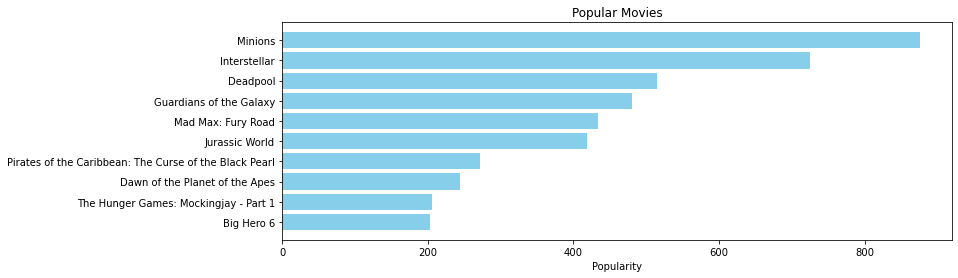

In [17]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# 인기있는 영화 탑 10

https://developers.themoviedb.org/3/getting-started/popularity    # '인기'를 산정할 때 지표

## 2. Content Based Filtering (컨텐츠 기반 필터링)
    내가 좋아하는 영화와 비슷한 영화를 추천한다.

### 줄거리를 기반으로 추천

In [18]:
df2['overview'].head(5)
# 영화에 대한 줄거리 (줄거리 텍스트 분석을 이용해 유사한 텍스트를 찾는다.)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

###### 백터화
Bag Of Words - BOW

1. CountVectorizer (각 단어가 문서에서 몇 번 출현했는지를 기반으로 문서를 벡터화)
2. TfidfVectorizer (CountVectorizer와 비슷하나, a나 the 같은 관사의 가중치를 조금만 두는 TF-IDF 기반의 백터화)   # 우리가 쓸 방법

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [21]:
df2['overview'].isnull().values.any()     # overview라는 컬럼 데이터에서 null에 해당하는 데이터를 가져와서, 하나라도 존재하면 True

True

In [22]:
df2['overview'] = df2['overview'].fillna('')    # 자동으로 null 값을 찾아 빈 값으로 채우고, 채운 값을 다시 overview에 할당

In [23]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape     # 4803의 문서가 20,978개의 단어로 이루어져있다

(4803, 20978)

In [24]:
tfidf_matrix      # 125,840개의 0이 아닌 데이터 존재

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [26]:
cosine_sim.shape

(4803, 4803)

In [27]:
indices = pd.Series(df2.index,index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [28]:
indices['The Dark Knight Rises']     # The Dark Knight Rises의 인덱스 값

3

In [29]:
df2.iloc[[3]]     # The Dark Knight Rises의 정보

budget                                             genres  \
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   

                             homepage     id  \
3  http://www.thedarkknightrises.com/  49026   

                                            keywords original_language  \
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   

          original_title                                           overview  \
3  The Dark Knight Rises  Following the death of District Attorney Harve...   

   popularity                               production_companies  ...  \
3   112.31295  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   

      revenue runtime                          spoken_languages    status  \
3  1084939099   165.0  [{"iso_639_1": "en", "name": "English"}]  Released   

           tagline                  title vote_average vote_count  \
3  The Legend Ends  The Dark Knight Rises          7.6       9106   

                                                cast  \
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   

                                                crew  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  

[1 rows x 22 columns]

In [30]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 반환
def get_recommendations(title, cosine_sim=cosine_sim):
    
    # 영화 제목을 통해서 전체 데이터 기준 그 영화의 index 값을 얻기
    idx = indices[title]
    
    # 코사인 유사도 매트릭스 (cosine_sim)에서 idx에 해당하는 데이터를 (idx, 유사도) 형태로 얻기
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 코사인 유사도 기준으로 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 자기자신을 제외한 10개의 추천 영화를 슬라이싱
    sim_scores = sim_scores[1:11]
    
    # 추천 영화 목록 10개의 인덱스 정보 추출
    movie_indices = [i[0] for i in sim_scores]
    
    # 인덱스 정보를 통해 영화 제목 추출
    return df2['title'].iloc[movie_indices]

In [31]:
df2['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [32]:
get_recommendations('The Dark Knight Rises')   # 영화의 줄거리를 기반으로 비슷한 영화가 추천된다.

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

### 장르, 감독, 키워드 등의 요소를 기반으로 추천

In [33]:
df2.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ...     revenue runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...  2787965087   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   961000000   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   880674609   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 22 columns]

In [34]:
df2.loc[0, 'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [35]:
s1 = [{"id": 28, "name": "Action"}]
s2 = '[{"id": 28, "name": "Action"}]'

In [36]:
type(s1), type(s2)   #s1은 list, s2는 string이다

(list, str)

In [37]:
# string을 list로 바꾸기
from ast import literal_eval
s2 = literal_eval(s2)
s2, type(s2)    # s2가 list로 바뀌었다

([{'id': 28, 'name': 'Action'}], list)

In [38]:
print(s1)
print(s2)
# s1과 s2가 같은 list로 바뀌었다

[{'id': 28, 'name': 'Action'}]
[{'id': 28, 'name': 'Action'}]


In [39]:
type(df2.loc[0, 'genres'])      # 타입이 string(문자열) 인 것을 알 수 있다

str

In [40]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)    # features 안의 feature들을 list로 변경

In [41]:
df2.loc[0, 'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [42]:
# 감독 정보를 추출
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
        return np.nan

In [43]:
df2['director'] = df2['crew'].apply(get_director)
df2['director']

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
4798    Robert Rodriguez
4799        Edward Burns
4800                 NaN
4801         Daniel Hsia
4802                 NaN
Name: director, Length: 4803, dtype: object

In [44]:
df2[df2['director'].isnull()]

budget                                             genres  \
0     237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
1     300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2     245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
3     250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4     260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
...         ...                                                ...   
4783          0  [{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...   
4786          0  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
4790          0  [{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...   
4800          0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4802          0                [{'id': 99, 'name': 'Documentary'}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4783                                                NaN  226458   
4786                                                NaN   44990   
4790                                                NaN   13898   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{'id': 1463, 'name': 'culture clash'}, {'id':...                en   
1     [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...                en   
2     [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...                en   
3     [{'id': 849, 'name': 'dc comics'}, {'id': 853,...                en   
4     [{'id': 818, 'name': 'based on novel'}, {'id':...                en   
...                                                 ...               ...   
4783               [{'id': 9712, 'name': 'possession'}]                en   
4786        [{'id': 10183, 'name': 'independent film'}]                en   
4790                                                 []                fa   
4800  [{'id': 248, 'name': 'date'}, {'id': 699, 'nam...                en   
4802  [{'id': 1523, 'name': 'obsession'}, {'id': 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4783                                  Backmask   
4786                          Breaking Upwards   
4790                                     دایره   
4800                 Signed, Sealed, Delivered   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4783  During an all-night, drug-fueled party at an a...    3.619167   
4786  'Breaking Upwards' explores a young, real-life...    0.674570   
4790  Various women struggle to function in the oppr...    1.193779   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4802  Ever since the second grade when he first saw ... 

In [45]:
df2.loc[0, 'cast']    # 출연진의 정보가 너무 방대하기에 핵심 정보만 뽑아낼 필요가 있다
                      # 따라서 처음 3개의 name 정보만 추출한다

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [46]:
df2.loc[0, 'genres']    # 장르도 마찬가지로 처음 3개의 name 정보만 추출한다

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [47]:
df2.loc[0, 'keywords']    # 키워드도 마찬가지로 처음 3개의 name 정보만 추출한다

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [48]:
# 처음 3개의 데이터 중에서 name 에 해당하는 value 만 추출
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
            return names
        return []

In [49]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [50]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                               cast director  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]      NaN   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]      NaN   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]      NaN   

                              keywords                        genres  
0   [culture clash, future, space war]  [Action, Adventure, Fantasy]  
1   [ocean, drug abuse, exotic island]                            []  
2  [spy, based on novel, secret agent]                            []

In [51]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ', '')) for i in x]     # 빈칸을 없애고 소문자로 바꾼다
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))       # 혹시 list가 아닌 string 데이터가 있다면, 똑같이 빈칸을 없애고 소문자로 바꾼다
        else:
            return ''           # string 형태가 아니면 빈 값을 반환

In [52]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [53]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)     # 소문자로 바뀌고 띄어쓰기가 제거된 모습

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            cast director  \
0  [samworthington, zoesaldana, sigourneyweaver]            
1     [johnnydepp, orlandobloom, keiraknightley]            
2      [danielcraig, christophwaltz, léaseydoux]            

                           keywords                        genres  
0  [cultureclash, future, spacewar]  [action, adventure, fantasy]  
1  [ocean, drugabuse, exoticisland]                            []  
2  [spy, basedonnovel, secretagent]                            []

In [54]:
# 콤마를 없애고 띄어쓰기로 구분
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)
df2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])
count_matrix

<4803x9404 sparse matrix of type '<class 'numpy.int64'>'
	with 28670 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2
# 1은 유사도 100%. 즉, 자기 자신
# 1을 제외하고 가장 높은 값이 유사도가 가장 높다

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [57]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index = df2['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [58]:
get_recommendations('The Dark Knight Rises', cosine_sim2)   # '다크나이트 라이즈'와 비슷한 영화 추천

65                 The Dark Knight
3073             Romeo Is Bleeding
119                  Batman Begins
747                 Gangster Squad
1470                        Stolen
1503                        Takers
1986                        Faster
2154                  Street Kings
2277    The Baader Meinhof Complex
3332                   Harry Brown
Name: title, dtype: object

In [59]:
get_recommendations('Zodiac', cosine_sim2)      # '조디악'과 비슷한 영화 추천

4370                               Brigham City
2507                                  Slow Burn
1418    Midnight in the Garden of Good and Evil
3869                              The Dead Girl
314                        The Spanish Prisoner
696                      The General's Daughter
758                            Edge of Darkness
1087                                 The Pledge
1151                            Double Jeopardy
1374                          L.A. Confidential
Name: title, dtype: object

In [60]:
indices['Zodiac']    # '조디악'은 421번 인덱스

421

In [61]:
df2.loc[421]   # '조디악'의 영화 데이터

index                                                                 421
budget                                                           65000000
genres                                            [crime, drama, mystery]
homepage                                                              NaN
id                                                                   1949
keywords                              [california, sanfrancisco, killing]
original_language                                                      en
original_title                                                     Zodiac
overview                The true story of the investigation of 'The Zo...
popularity                                                      51.970905
production_companies    [{"name": "Paramount Pictures", "id": 4}, {"na...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2007-03-02
revenue                               

In [62]:
df2.loc[4370]    # '조디악'과 유사도가 가장 비슷했던 '브라이엄 시티'의 영화 데이터
# 이 경우에는 장르의 정보가 똑같기에 가장 유사한 영화로 추천되었다

index                                                                4370
budget                                                            1000000
genres                                            [crime, drama, mystery]
homepage                                                              NaN
id                                                                  26791
keywords                                                               []
original_language                                                      en
original_title                                               Brigham City
overview                Wes Clayton is a lawman and a bishop in a Morm...
popularity                                                       0.280083
production_companies    [{"name": "Main Street Movie Company", "id": 6...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2001-03-30
revenue                               

'브라이엄 시티' 의 영화 정보  
https://www.mycelebs.com/movie/252341/total  
'조디악'과 마찬가지로 연쇄 살인범과 관련된 범죄, 미스터리, 수사 영화임을 알 수 있다

In [63]:
import pickle

In [64]:
movies = df2[['id', 'title']].copy()     # id와 title 정보만 빼오기
movies.head(5)

id                                     title
0   19995                                    Avatar
1     285  Pirates of the Caribbean: At World's End
2  206647                                   Spectre
3   49026                     The Dark Knight Rises
4   49529                               John Carter

In [65]:
pickle.dump(movies, open('movies.pickle', 'wb')) # 덤핑, 출력

In [66]:
pickle.dump(cosine_sim2, open('cosine_sim.pickle', 'wb'))